# This notebook is made for a part of Coventry University's coursework.
Dataset is accessible on https://www.kaggle.com/sobhanmoosavi/us-accidents

## This is part two of the coursework - visualisation

Produced by Sunggu Choi

In [3]:
#Load necessary library
import pandas as pd
import gc
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Load Pre-processed dataset
df = pd.read_csv('pySparkout.csv')

In [3]:
df

,Unnamed: 0,ID,Severity,Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,Montgomery,OH,36.9,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,Franklin,OH,37.9,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,A-3,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,Clermont,OH,36.0,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,A-4,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,Montgomery,OH,35.1,...,False,False,False,False,False,False,Night,Day,Day,Day
4,4,A-5,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,Montgomery,OH,36.0,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,3513612,A-3513776,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,Riverside,CA,86.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,3513613,A-3513777,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,San Diego,CA,70.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,3513614,A-3513778,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,Orange,CA,73.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,3513615,A-3513779,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,Los Angeles,CA,71.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,ID,Severity,Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Wind_Chill(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,Montgomery,OH,36.9,0.0,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,Franklin,OH,37.9,0.0,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,Clermont,OH,36.0,33.3,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,Montgomery,OH,35.1,31.0,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,Montgomery,OH,36.0,33.3,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,Riverside,CA,86.0,86.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,San Diego,CA,70.0,70.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,Orange,CA,73.0,73.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,Los Angeles,CA,71.0,71.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [18]:
#fliter the data from 

df_map = df[['Severity', 'State']]
df_map

,Severity,State
0,3,OH
1,2,OH
2,2,OH
3,3,OH
4,2,OH
...,...,...
3513612,2,CA
3513613,2,CA
3513614,2,CA
3513615,2,CA


# Check where the car accident happened

Firstly, need to look at an overall severity by State so able to identify which area has the most severity


In [6]:
import folium
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

state_data = df_map

map = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Severity'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Severity By State'
).add_to(map)

folium.LayerControl().add_to(map)

map

In [7]:
#Fliter the State by Severity, 4 is Highest
df_flitered_severity = df.loc[df['Severity'] == 4] #Find the highest area
df_flitered_severity['State'].value_counts().idxmax() #Find which states


'FL'

### Since Florida is has highest rate so need to create a heat map so can look at which area has level 4 severity

In [19]:
df_flitered_states = df[['State','Start_Lat','Start_Lng']]
df_flitered_by_FL = df_flitered_states.loc[df['State'] == 'FL']
df_flitered_by_FL


,State,Start_Lat,Start_Lng
116060,FL,27.981367,-82.326561
116061,FL,27.981367,-82.326561
116062,FL,25.627699,-80.374451
116063,FL,25.899435,-80.346680
116064,FL,26.272926,-80.296432
...,...,...,...
3513285,FL,26.843520,-80.104600
3513286,FL,29.406330,-81.156440
3513291,FL,27.965090,-82.447270
3513296,FL,28.547080,-81.270170


In [9]:
#Next, need to generate a heatmap which part of Florida has highest severity

from folium.plugins import HeatMap

FL_HeatMap = folium.Map(location=[27.981367, -82.326561], zoom_start=6.5)
HeatMap(data=df_flitered_by_FL[['Start_Lat', 'Start_Lng']].groupby(['Start_Lat', 'Start_Lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(FL_HeatMap)
FL_HeatMap

After generating heatmap, need to look at the actual time when does it happened so which factor is highly affected among these columns, so need to invesigate Timeline

In [20]:
#Generate DataFrame for HeatMapWithTime
df_flitered_states_Time = df[['Severity','Time','State','Start_Lat','Start_Lng']]
df_flitered_by_FL_Time = df_flitered_states_Time.loc[df['State'] == 'FL']



### Fliter which severity has more

### Time period: 0600-1100 morning | 1200 - 1700 afternoon | 1800 - 0500 evening

In [21]:
#Arrange the car accdient by Serverity after that Arrange it by time
df_flitered_by_FL_Time[['Severity','Time']]
# df_severity = df_flitered_by_FL_Time.sort_values(by=['Severity'])
"""Find a time? """

df_flitered_by_FL_Time

# #Sort it out in the time range 0600-1100 hours so how may car accident happended
# # Probably find a day which has the most car crash?

# #Change DataFrame to DateTime 2016-11-30 15:36:03 YYYY-MM-DD HH:MM:SS

df_flitered_FL_datetime = pd.to_datetime(df_flitered_by_FL_Time ['Time'], format='%Y/%m/%d %H:%M:%S')
# df_flitered_FL_datetime


In [22]:
df_flitered_FL_datetime.head()


116060   2016-11-30 15:36:03
116061   2016-11-30 16:25:35
116062   2016-11-30 16:40:31
116063   2016-11-30 16:34:57
116064   2016-11-30 16:38:41
Name: Time, dtype: datetime64[ns]

In [23]:
# Describing data

df_flitered_by_FL_Time.describe()
df_flitered_by_FL_Time.head()


,Severity,Time,State,Start_Lat,Start_Lng
116060,3,2016-11-30 15:36:03,FL,27.981367,-82.326561
116061,3,2016-11-30 16:25:35,FL,27.981367,-82.326561
116062,2,2016-11-30 16:40:31,FL,25.627699,-80.374451
116063,3,2016-11-30 16:34:57,FL,25.899435,-80.346680
116064,2,2016-11-30 16:38:41,FL,26.272926,-80.296432


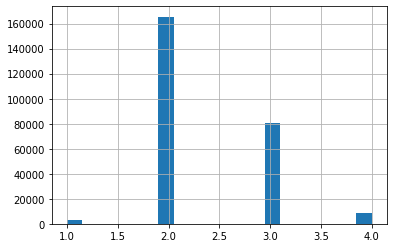

In [24]:
# Ploting Severity and Time
# import seaborn as sns;

df_flitered_by_FL_Time.Severity.hist(bins=20)


# The result turns out Seveity level 2 is the common 
# Need to investigate the factor of 2.0

In [5]:

df_FL_severity_two = df[df['State'] == 'FL']
df_FL_severity_two

# df_FL_severity_two = df_flitered_by_FL_Time[df_flitered_by_FL_Time['Severity'] == 2]
# df_FL_severity_two

,Unnamed: 0,ID,Severity,Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
116060,116060,A-116062,3,2016-11-30 15:36:03,27.981367,-82.326561,Tampa,Hillsborough,FL,80.6,...,False,False,False,False,False,False,Day,Day,Day,Day
116061,116061,A-116063,3,2016-11-30 16:25:35,27.981367,-82.326561,Tampa,Hillsborough,FL,80.6,...,False,False,False,False,False,False,Day,Day,Day,Day
116062,116062,A-116064,2,2016-11-30 16:40:31,25.627699,-80.374451,Miami,Miami-Dade,FL,80.1,...,False,False,False,False,True,False,Day,Day,Day,Day
116063,116063,A-116065,3,2016-11-30 16:34:57,25.899435,-80.346680,Hialeah,Miami-Dade,FL,80.1,...,False,False,False,False,False,False,Day,Day,Day,Day
116064,116064,A-116066,2,2016-11-30 16:38:41,26.272926,-80.296432,Pompano Beach,Broward,FL,79.0,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513285,3513285,A-3513449,2,2019-08-23 14:16:20,26.843520,-80.104600,Palm Beach Gardens,Palm Beach,FL,86.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513286,3513286,A-3513450,3,2019-08-23 14:12:39,29.406330,-81.156440,Flagler Beach,Flagler,FL,84.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513291,3513291,A-3513455,4,2019-08-23 17:28:24,27.965090,-82.447270,Tampa,Hillsborough,FL,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3513296,3513296,A-3513460,4,2019-08-23 19:51:27,28.547080,-81.270170,Orlando,Orange,FL,83.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
# End of data demonstartion

#Export the data
df_FL_severity_two.to_csv('df_FL_two.csv', index=False) 